## Portfolio Optimization using Quadratic Unconstraint Binary Optimization (QUBOs) with Constraints

In [6]:
import pygrnd
from pygrnd.optimize.MonteCarloGradientSearch import *

In [7]:
import numpy as np
#from functions import Long_Short, Cov_Matrix_Resolution
#from pygrnd.optimize.helpers.qubomatrix import matrix_to_qubo
#from pygrnd.optimize.simulate.anneal import anneal_qubo
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

### First write matrix in qubo form

A QUBO problem is defined using an upper-diagonal matrix Q, which is an N x N upper-triangular matrix of real weights, and x, a vector of binary variables, as minimizing the function
$$ f(x) = \sum_{i} Q_{i,i} x_{i} + \sum_{i<j} Q_{i,j} x_{i} x_{j}  $$
with $Q_{i,i}$ are the linear coefficients and $Q_{i,j}$ nonzero off-diagonal terms are the quadratic coefficients. Or different representation:
$$ min_{x \in \{0,1\}^{N}} x^{T} Q x $$

In [8]:
bigq=np.zeros((30,30))
cov = np.load("DAXCovMat.npy")
c1=np.zeros((30,30))
qc1=np.zeros((30,30))

def MakeQubo(m):
        for x in range(np.size(m,0)):
            for y in range(np.size(m,1)):
                if x>y:
                    m[x,y]=0
                if x<y:
                    m[x,y]=2*m[x,y]
        return(m)


def BuildConstraintMatrix1(la,lp,sp):
    big=np.zeros((30,30))
    sa=30-la
    # constraint for the longs
    for x in range(30):
        for y in range(30):
            qc1[x,y]=0
    for x in range(la):
        for y in range(la):
            qc1[x,y]=1
            if x==y:
                qc1[x,y]=-2*lp+1
    # constraint for the shorts
    for x in range(sa):
        for y in range(sa):
            qc1[la+x,la+y]=1
            if x==y:
                qc1[la+x,la+y]=-2*sp+1
    for x in range(la):
        for y in range(la):
            c1[x,y]=cov[x,y]
    # cov for short-short
    for x in range(sa):
        for y in range(sa):
            c1[la+x,la+y]=cov[la+x,la+y]
    # cov for long-short
    for x in range(sa):
        for y in range(la):
            c1[la+x,y] = -cov[la+x,y]
    for x in range(la):
        for y in range(sa):
            c1[x,la+y] = -cov[x,la+y]
    plt.matshow(c1)
    plt.matshow(qc1)
    big=MakeQubo(c1+qc1)
    for x in range(30):
        for y in range(30):
            bigq[x,y]=big[x,y]
    return()

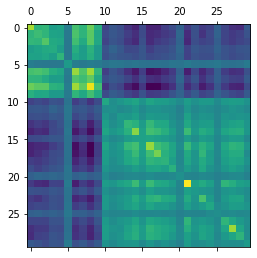

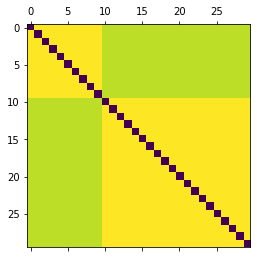

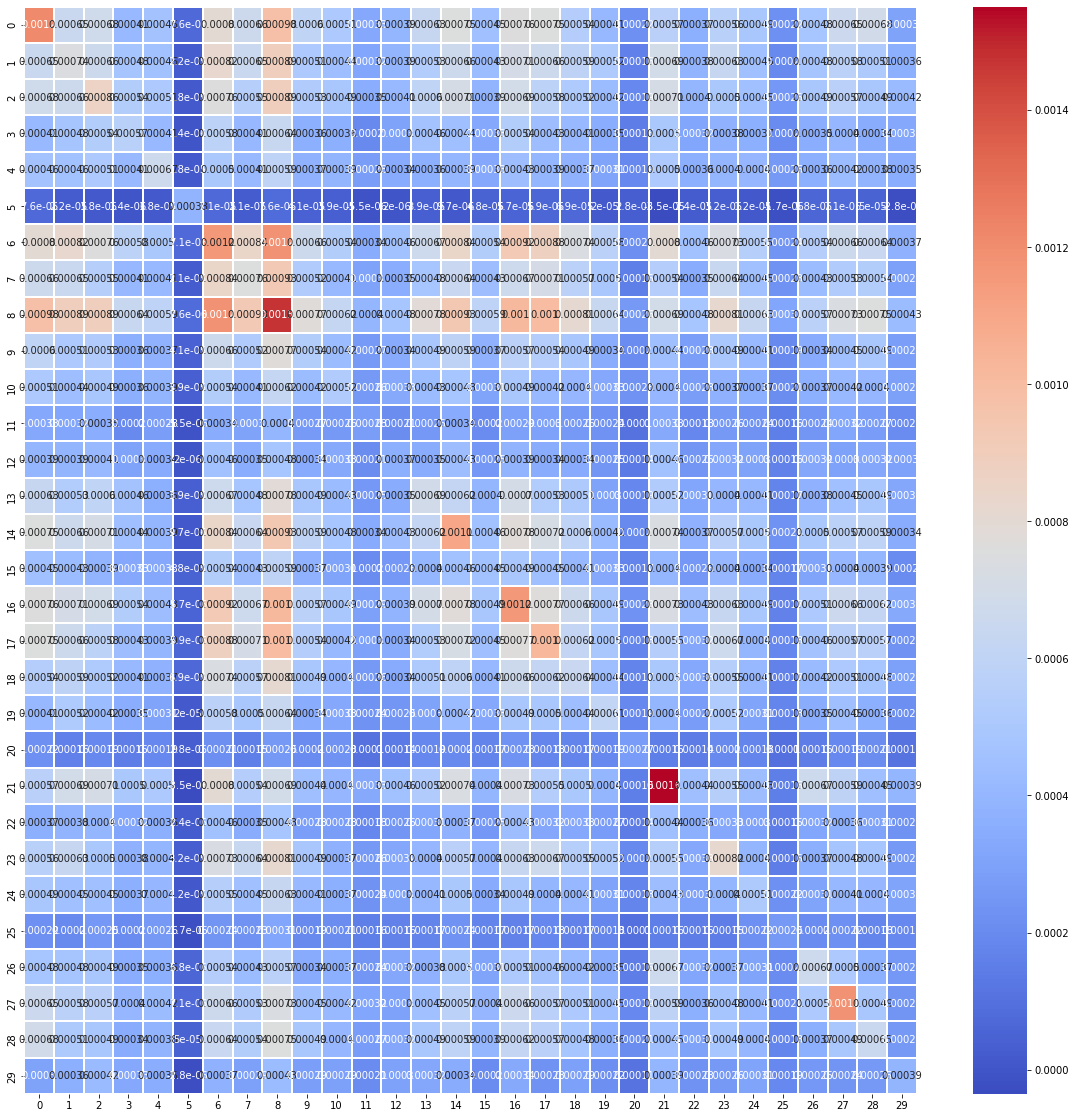

Button(description='SOLVE!', style=ButtonStyle())

In [10]:
La = widgets.IntSlider(
    min=0,
    max=30,
    step=1,
    description='LongvShort:',
    value=10
)
Long = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Buy:',
    value=5
)
Short = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Sell:',
    value=5
)

ui = widgets.HBox([widgets.HBox([La, Long, Short])])

out = widgets.interactive_output(BuildConstraintMatrix1, {'la': La, 'lp': Long, 'sp': Short})

outputCovPlot = widgets.Output()

button = widgets.Button(description="SOLVE!")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        #qubo = matrix_to_qubo(bigq)
        #result=anneal_qubo(qubo, num_anneals=50)
        #qubo_solution = result.best.state
        res,vec=MCgradientSearch(bigq,10000)
        
        #print("Variable assignment:", qubo_solution)
        #print("value:", result.best.value)
        #print("Constraints satisfied?", qubo.is_solution_valid(qubo_solution))
        #for key in qubo_solution.keys():
            #if qubo_solution[key] == 1:
                #if key < La.value:
                    #print("buy:", key)
                #else:
                    #print("sell:", key)
        for i in range(len(vec)):
            if vec[i] == 1:
                if i <La.value:
                    print("buy: ",i)
                else:
                    print("sell: ",i)

button.on_click(on_button_clicked)

tab = widgets.Tab([outputCovPlot, out, output])
tab.set_title(0, 'Input')
tab.set_title(1, 'Heatmap')
tab.set_title(2, 'Solution')

with outputCovPlot:
    plt.figure(figsize=(20,20))
    sns.heatmap(cov, cmap='coolwarm', annot=True, linewidth=.3)
    plt.show()

display(ui, button, tab)

In [5]:
bigq

array([[-8.99878549e+00,  2.00130057e+00,  2.00136120e+00,
         2.00082910e+00,  2.00092647e+00,  2.00015176e+00,
         2.00159043e+00,  2.00132217e+00,  2.00195218e+00,
         2.00120050e+00, -1.01123453e-03, -6.57586233e-04,
        -7.86702377e-04, -1.25707960e-03, -1.50679291e-03,
        -9.04538169e-04, -1.52106208e-03, -1.50745922e-03,
        -1.08378028e-03, -8.14454937e-04, -4.46813628e-04,
        -1.13701088e-03, -7.33915741e-04, -1.11983223e-03,
        -9.87154640e-04, -4.45696538e-04, -9.63284620e-04,
        -1.30723675e-03, -1.36831334e-03, -6.03324108e-04],
       [ 0.00000000e+00, -8.99925543e+00,  2.00132851e+00,
         2.00095003e+00,  2.00091028e+00,  2.00004307e+00,
         2.00164308e+00,  2.00130474e+00,  2.00178782e+00,
         2.00101722e+00, -8.73219093e-04, -6.30589374e-04,
        -7.84074760e-04, -1.06745804e-03, -1.32875525e-03,
        -8.51103139e-04, -1.41579336e-03, -1.32720818e-03,
        -1.17369970e-03, -1.03787839e-03, -3.16971322e-